In [11]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import random

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [5]:
print("My train data Shape:", train_data.shape)
print("My train labels :", train_labels.shape)
print("Maximum label : ", train_labels.max())

My train data Shape: (60000, 28, 28)
My train labels : (60000,)
Maximum label :  9


Selecteren uit de train_data en plotten

Text(0.5, 1.0, 'Trouser')

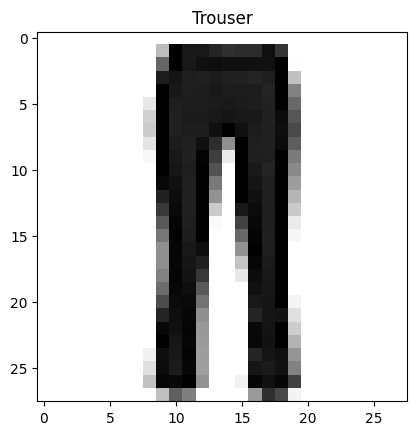

In [36]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
index_of_choice = 59635
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

2D -> 1D vector <br/>
hidden layer met 4 nodes <br/>
hidden layer met 4 nodes <br/>
output layer met 10 nodes <br/>
softmax -> waarschijnlheid <br/>
<br/>
voorspelling naar True of False <br/>
Adam is een optimalisatie waardoor de leersnelheid automatisch aanpast <br/>
accuracy houdt bij hoe goed het model voorspelt naar de juiste class toe <br/>
<br/>
.fit() zorgt voor het leren van de mee gegeven 1D vectors <br/>
validation_data is een apparte dataset om bij te houden wat het model doet na elke epoch. Helpt voor het aanpassen van de performance en overfitting

In [37]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= train_data[0].shape),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

non_norm_history = model_1.fit(train_data,train_labels,epochs=10,validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.1000 - loss: 2.5355 - val_accuracy: 0.1000 - val_loss: 2.3028
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1010 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.0988 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0990 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1020 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0982 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0989 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0988 - loss: 2.3028 - 

In [8]:
train_data_norm = train_data / train_data.max()
test_data_norm = test_data / test_data.max()

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= train_data[0].shape),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(0.001),
                metrics = ["Accuracy"])
norm_history = model.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm, test_labels))

c:\Users\jdvis_x5odeao\Semester_4\DEDS_Portfolio\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - Accuracy: 0.3596 - loss: 1.7174 - val_Accuracy: 0.6661 - val_loss: 0.9493
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - Accuracy: 0.7077 - loss: 0.8529 - val_Accuracy: 0.7583 - val_loss: 0.7296
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - Accuracy: 0.7604 - loss: 0.6863 - val_Accuracy: 0.7660 - val_loss: 0.6701
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - Accuracy: 0.7769 - loss: 0.6358 - val_Accuracy: 0.7819 - val_loss: 0.6368
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - Accuracy: 0.7868 - loss: 0.6006 - val_Accuracy: 0.7835 - val_loss: 0.6211
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - Accuracy: 0.7959 - loss: 0.5748 - val_Accuracy: 0.7820 - val_loss: 0.6106
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - Accuracy: 0.7960 - loss: 0.5736 - val_Accuracy: 0.7955 - val_loss: 0.5957
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - Accuracy: 0.8037 - loss: 0.5583 - 

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7823 - loss: 0.6302
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8612 - loss: 0.3867
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8738 - loss: 0.3450
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8837 - loss: 0.3130
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8940 - loss: 0.2914
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8979 - loss: 0.2771
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8993 - loss: 0.2710
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9047 - loss: 0.2575
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9081 - loss: 0.2474
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9105 - loss: 0.2382
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


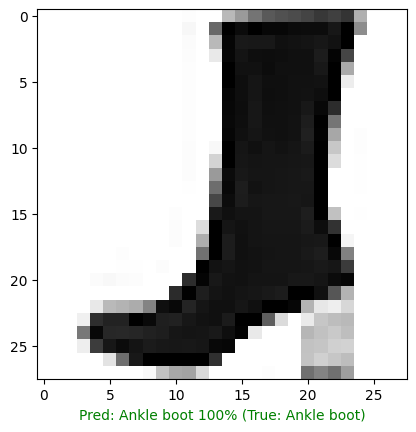

In [13]:
def plot_random_image(model, images, true_labels, classes):
  i = random.randint(0, len(images))
  image_to_predict = images[i]
  true_positive_image = classes[true_labels[i]]
  pred_probs = model.predict(tf.expand_dims(image_to_predict, axis=0))
  predicted_image = classes[pred_probs.argmax()]

  plt.imshow(image_to_predict, cmap=plt.cm.binary)
  if(predicted_image == true_positive_image):
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(predicted_image,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_positive_image),color=color)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),     
    tf.keras.layers.Dense(128, activation='relu'),       
    tf.keras.layers.Dense(10, activation='softmax')       
])

model_4.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model_4.fit(train_data_norm, train_labels, epochs=10)

plot_random_image(model_4,test_data_norm,test_labels,class_names)